In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('Data/processed/processed.csv')


In [4]:
df.head()


,E_0,E_1,E_10,E_100,E_101,E_102,E_103,E_104,E_105,E_106,...,E_93,E_94,E_95,E_96,E_97,E_98,E_99,pathology,age,sex
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Anemia,55,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Panic attack,10,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,Influenza,68,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Anemia,13,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Boerhaave,48,1


In [5]:
df.describe()


,E_0,E_1,E_10,E_100,E_101,E_102,E_103,E_104,E_105,E_106,...,E_92,E_93,E_94,E_95,E_96,E_97,E_98,E_99,age,sex
count,130391.0000,130391.000000,130391.000000,130391.000000,130391.000000,130391.000000,130391.000000,130391.000000,130391.000000,130391.000000,...,130391.000000,130391.000000,130391.000000,130391.000000,130391.000000,130391.000000,130391.000000,130391.000000,130391.000000,130391.000000
mean,0.0385,0.013789,0.015722,0.008459,0.011542,0.006749,0.028445,0.081363,0.077613,0.056883,...,0.016612,0.011458,0.035654,0.016734,0.016719,0.094623,0.017708,0.013743,40.428028,0.485501
std,0.1924,0.116616,0.124398,0.091584,0.106813,0.081875,0.166242,0.273393,0.267562,0.231619,...,0.127811,0.106427,0.185427,0.128275,0.128217,0.292695,0.131889,0.116424,22.356481,0.499792
min,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000
50%,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000
75%,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000,1.000000
max,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,109.000000,1.000000


In [6]:
y = df['pathology']
X = df.drop('pathology', axis=1)

X.head(), y.head()


(   E_0  E_1  E_10  E_100  E_101  E_102  E_103  E_104  E_105  E_106  ...  E_92  \
 0    0    0     0      0      0      0      0      0      0      0  ...     0   
 1    0    0     0      0      0      0      0      0      0      0  ...     0   
 2    0    0     0      0      0      0      0      0      0      0  ...     0   
 3    0    0     0      0      0      0      0      0      0      0  ...     0   
 4    0    0     0      0      0      0      0      0      0      0  ...     0   
 
    E_93  E_94  E_95  E_96  E_97  E_98  E_99  age  sex  
 0     0     0     0     0     0     0     0   55    0  
 1     0     0     0     0     0     0     0   10    0  
 2     0     1     0     0     0     0     0   68    0  
 3     0     0     0     0     0     0     0   13    1  
 4     0     0     0     0     0     0     0   48    1  
 
 [5 rows x 216 columns],
 0          Anemia
 1    Panic attack
 2       Influenza
 3          Anemia
 4       Boerhaave
 Name: pathology, dtype: object)

In [7]:
from sklearn.preprocessing import OneHotEncoder


In [8]:
encoder = OneHotEncoder()

encoder.fit(y.values.reshape(-1, 1))

y = encoder.transform(y.values.reshape(-1, 1)).toarray()


In [9]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((104312, 216), (26079, 216), (104312, 49), (26079, 49))

In [11]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    strat_X_train, strat_X_test = X.iloc[train_index], X.iloc[test_index]
    strat_y_train, strat_y_test = y[train_index], y[test_index]

strat_X_train.shape, strat_X_test.shape, strat_y_train.shape, strat_y_test.shape


((104312, 216), (26079, 216), (104312, 49), (26079, 49))

In [12]:
""" def cat_proportions(data):
    return data["pathology"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": df['pathology'].value_counts() / len(df),
    "Stratified": strat_y_test.value_counts() / len(strat_y_test),
    "Random": y_train.value_counts() / len(y_train),
}).sort_index()
compare_props["Rand. %error"] = abs(100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] = abs(100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

compare_props  """




' def cat_proportions(data):\n    return data["pathology"].value_counts() / len(data)\n\ncompare_props = pd.DataFrame({\n    "Overall": df[\'pathology\'].value_counts() / len(df),\n    "Stratified": strat_y_test.value_counts() / len(strat_y_test),\n    "Random": y_train.value_counts() / len(y_train),\n}).sort_index()\ncompare_props["Rand. %error"] = abs(100 * compare_props["Random"] / compare_props["Overall"] - 100)\ncompare_props["Strat. %error"] = abs(100 * compare_props["Stratified"] / compare_props["Overall"] - 100)\n\ncompare_props  '

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>pathology</th>
      <th>Overall</th>
      <th>Stratified</th>
      <th>Random</th>
      <th>Rand. %error</th>
      <th>Strat. %error</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Acute COPD exacerbation / infection</th>
      <td>0.015921</td>
      <td>0.015913</td>
      <td>0.015895</td>
      <td>0.167828</td>
      <td>0.051236</td>
    </tr>
    <tr>
      <th>Acute dystonic reactions</th>
      <td>0.024580</td>
      <td>0.024579</td>
      <td>0.024590</td>
      <td>0.039769</td>
      <td>0.003068</td>
    </tr>
    <tr>
      <th>Acute laryngitis</th>
      <td>0.025569</td>
      <td>0.025576</td>
      <td>0.025318</td>
      <td>0.981544</td>
      <td>0.026925</td>
    </tr>
    <tr>
      <th>Acute otitis media</th>
      <td>0.025838</td>
      <td>0.025845</td>
      <td>0.025941</td>
      <td>0.401482</td>
      <td>0.026614</td>
    </tr>
    <tr>
      <th>Acute pulmonary edema</th>
      <td>0.019173</td>
      <td>0.019173</td>
      <td>0.019777</td>
      <td>3.150791</td>
      <td>0.003068</td>
    </tr>
    <tr>
      <th>Acute rhinosinusitis</th>
      <td>0.014311</td>
      <td>0.014303</td>
      <td>0.014006</td>
      <td>2.129474</td>
      <td>0.056657</td>
    </tr>
    <tr>
      <th>Allergic sinusitis</th>
      <td>0.016151</td>
      <td>0.016143</td>
      <td>0.015952</td>
      <td>1.233810</td>
      <td>0.050550</td>
    </tr>
    <tr>
      <th>Anaphylaxis</th>
      <td>0.027970</td>
      <td>0.027992</td>
      <td>0.027552</td>
      <td>1.493623</td>
      <td>0.079189</td>
    </tr>
    <tr>
      <th>Anemia</th>
      <td>0.051660</td>
      <td>0.051651</td>
      <td>0.052218</td>
      <td>1.080793</td>
      <td>0.017913</td>
    </tr>
    <tr>
      <th>Atrial fibrillation</th>
      <td>0.019495</td>
      <td>0.019479</td>
      <td>0.019566</td>
      <td>0.364656</td>
      <td>0.081743</td>
    </tr>
    <tr>
      <th>Boerhaave</th>
      <td>0.015914</td>
      <td>0.015913</td>
      <td>0.015703</td>
      <td>1.324544</td>
      <td>0.003068</td>
    </tr>
    <tr>
      <th>Bronchiectasis</th>
      <td>0.017785</td>
      <td>0.017792</td>
      <td>0.017917</td>
      <td>0.744628</td>
      <td>0.040053</td>
    </tr>
    <tr>
      <th>Bronchiolitis</th>
      <td>0.000084</td>
      <td>0.000077</td>
      <td>0.000077</td>
      <td>9.090212</td>
      <td>9.093698</td>
    </tr>
    <tr>
      <th>Bronchitis</th>
      <td>0.026444</td>
      <td>0.026458</td>
      <td>0.026689</td>
      <td>0.928848</td>
      <td>0.054935</td>
    </tr>
    <tr>
      <th>Bronchospasm / acute asthma exacerbation</th>
      <td>0.016604</td>
      <td>0.016603</td>
      <td>0.016642</td>
      <td>0.231716</td>
      <td>0.003068</td>
    </tr>
    <tr>
      <th>Chagas</th>
      <td>0.008475</td>
      <td>0.008474</td>
      <td>0.008379</td>
      <td>1.130463</td>
      <td>0.003068</td>
    </tr>
    <tr>
      <th>Chronic rhinosinusitis</th>
      <td>0.020837</td>
      <td>0.020821</td>
      <td>0.020698</td>
      <td>0.670935</td>
      <td>0.076676</td>
    </tr>
    <tr>
      <th>Cluster headache</th>
      <td>0.021788</td>
      <td>0.021780</td>
      <td>0.021810</td>
      <td>0.097565</td>
      <td>0.038265</td>
    </tr>
    <tr>
      <th>Croup</th>
      <td>0.001741</td>
      <td>0.001726</td>
      <td>0.001620</td>
      <td>6.937612</td>
      <td>0.884098</td>
    </tr>
    <tr>
      <th>Ebola</th>
      <td>0.000675</td>
      <td>0.000690</td>
      <td>0.000661</td>
      <td>1.987885</td>
      <td>2.269590</td>
    </tr>
    <tr>
      <th>Epiglottitis</th>
      <td>0.016658</td>
      <td>0.016642</td>
      <td>0.016374</td>
      <td>1.702745</td>
      <td>0.095146</td>
    </tr>
    <tr>
      <th>GERD</th>
      <td>0.025646</td>
      <td>0.025653</td>
      <td>0.024820</td>
      <td>3.221447</td>
      <td>0.026836</td>
    </tr>
    <tr>
      <th>Guillain-Barré syndrome</th>
      <td>0.019296</td>
      <td>0.019288</td>
      <td>0.019451</td>
      <td>0.805622</td>
      <td>0.042812</td>
    </tr>
    <tr>
      <th>HIV (initial infection)</th>
      <td>0.028898</td>
      <td>0.028912</td>
      <td>0.029038</td>
      <td>0.485112</td>
      <td>0.050009</td>
    </tr>
    <tr>
      <th>Influenza</th>
      <td>0.026927</td>
      <td>0.026918</td>
      <td>0.027121</td>
      <td>0.719941</td>
      <td>0.031549</td>
    </tr>
    <tr>
      <th>Inguinal hernia</th>
      <td>0.020047</td>
      <td>0.020054</td>
      <td>0.019998</td>
      <td>0.247896</td>
      <td>0.035187</td>
    </tr>
    <tr>
      <th>Larygospasm</th>
      <td>0.005062</td>
      <td>0.005062</td>
      <td>0.005100</td>
      <td>0.758348</td>
      <td>0.003068</td>
    </tr>
    <tr>
      <th>Localized edema</th>
      <td>0.027709</td>
      <td>0.027723</td>
      <td>0.027619</td>
      <td>0.324450</td>
      <td>0.052286</td>
    </tr>
    <tr>
      <th>Myasthenia gravis</th>
      <td>0.016159</td>
      <td>0.016143</td>
      <td>0.015962</td>
      <td>1.221359</td>
      <td>0.097986</td>
    </tr>
    <tr>
      <th>Myocarditis</th>
      <td>0.011604</td>
      <td>0.011619</td>
      <td>0.011677</td>
      <td>0.628663</td>
      <td>0.129116</td>
    </tr>
    <tr>
      <th>PSVT</th>
      <td>0.018122</td>
      <td>0.018137</td>
      <td>0.018004</td>
      <td>0.655184</td>
      <td>0.081568</td>
    </tr>
    <tr>
      <th>Pancreatic neoplasm</th>
      <td>0.019802</td>
      <td>0.019786</td>
      <td>0.020170</td>
      <td>1.859805</td>
      <td>0.080525</td>
    </tr>
    <tr>
      <th>Panic attack</th>
      <td>0.024825</td>
      <td>0.024809</td>
      <td>0.024906</td>
      <td>0.325144</td>
      <td>0.064851</td>
    </tr>
    <tr>
      <th>Pericarditis</th>
      <td>0.023253</td>
      <td>0.023237</td>
      <td>0.023391</td>
      <td>0.594439</td>
      <td>0.069029</td>
    </tr>
    <tr>
      <th>Pneumonia</th>
      <td>0.026045</td>
      <td>0.026036</td>
      <td>0.025989</td>
      <td>0.212721</td>
      <td>0.032513</td>
    </tr>
    <tr>
      <th>Possible NSTEMI / STEMI</th>
      <td>0.022571</td>
      <td>0.022585</td>
      <td>0.022615</td>
      <td>0.196147</td>
      <td>0.064888</td>
    </tr>
    <tr>
      <th>Pulmonary embolism</th>
      <td>0.028000</td>
      <td>0.027992</td>
      <td>0.027830</td>
      <td>0.608660</td>
      <td>0.030457</td>
    </tr>
    <tr>
      <th>Pulmonary neoplasm</th>
      <td>0.014503</td>
      <td>0.014494</td>
      <td>0.014591</td>
      <td>0.608915</td>
      <td>0.055948</td>
    </tr>
    <tr>
      <th>SLE</th>
      <td>0.011719</td>
      <td>0.011734</td>
      <td>0.011820</td>
      <td>0.867920</td>
      <td>0.127818</td>
    </tr>
    <tr>
      <th>Sarcoidosis</th>
      <td>0.022502</td>
      <td>0.022509</td>
      <td>0.022902</td>
      <td>1.781626</td>
      <td>0.031015</td>
    </tr>
    <tr>
      <th>Scombroid food poisoning</th>
      <td>0.016819</td>
      <td>0.016833</td>
      <td>0.017035</td>
      <td>1.288967</td>
      <td>0.088129</td>
    </tr>
    <tr>
      <th>Spontaneous pneumothorax</th>
      <td>0.010775</td>
      <td>0.010775</td>
      <td>0.010929</td>
      <td>1.424265</td>
      <td>0.003068</td>
    </tr>
    <tr>
      <th>Spontaneous rib fracture</th>
      <td>0.005997</td>
      <td>0.005982</td>
      <td>0.005992</td>
      <td>0.095142</td>
      <td>0.258814</td>
    </tr>
    <tr>
      <th>Stable angina</th>
      <td>0.017946</td>
      <td>0.017945</td>
      <td>0.017860</td>
      <td>0.480006</td>
      <td>0.003068</td>
    </tr>
    <tr>
      <th>Tuberculosis</th>
      <td>0.014986</td>
      <td>0.014993</td>
      <td>0.014754</td>
      <td>1.547351</td>
      <td>0.048108</td>
    </tr>
    <tr>
      <th>URTI</th>
      <td>0.064859</td>
      <td>0.064880</td>
      <td>0.065295</td>
      <td>0.671814</td>
      <td>0.032405</td>
    </tr>
    <tr>
      <th>Unstable angina</th>
      <td>0.021075</td>
      <td>0.021090</td>
      <td>0.020880</td>
      <td>0.927188</td>
      <td>0.069710</td>
    </tr>
    <tr>
      <th>Viral pharyngitis</th>
      <td>0.063064</td>
      <td>0.063078</td>
      <td>0.062821</td>
      <td>0.385348</td>
      <td>0.021254</td>
    </tr>
    <tr>
      <th>Whooping cough</th>
      <td>0.004118</td>
      <td>0.004103</td>
      <td>0.004046</td>
      <td>1.768334</td>
      <td>0.375496</td>
    </tr>
  </tbody>
</table>
</div>

In [13]:
#implement random forest classifier

from sklearn.ensemble import RandomForestClassifier

In [14]:
rf_clf = RandomForestClassifier(random_state=42)

In [15]:
#train the model

rf_clf.fit(strat_X_train, strat_y_train)

RandomForestClassifier(random_state=42)

In [16]:
#save the model

""" import joblib

joblib.dump(rf_clf, 'Models/rf_clf_nop.pkl') """

['Models/rf_clf_nop.pkl']

In [ ]:
#load the model

""" rf_clf = joblib.load('Models/rf_clf_nop.pkl') """

In [25]:
#important features

feature_importances = rf_clf.feature_importances_

len(feature_importances)

216

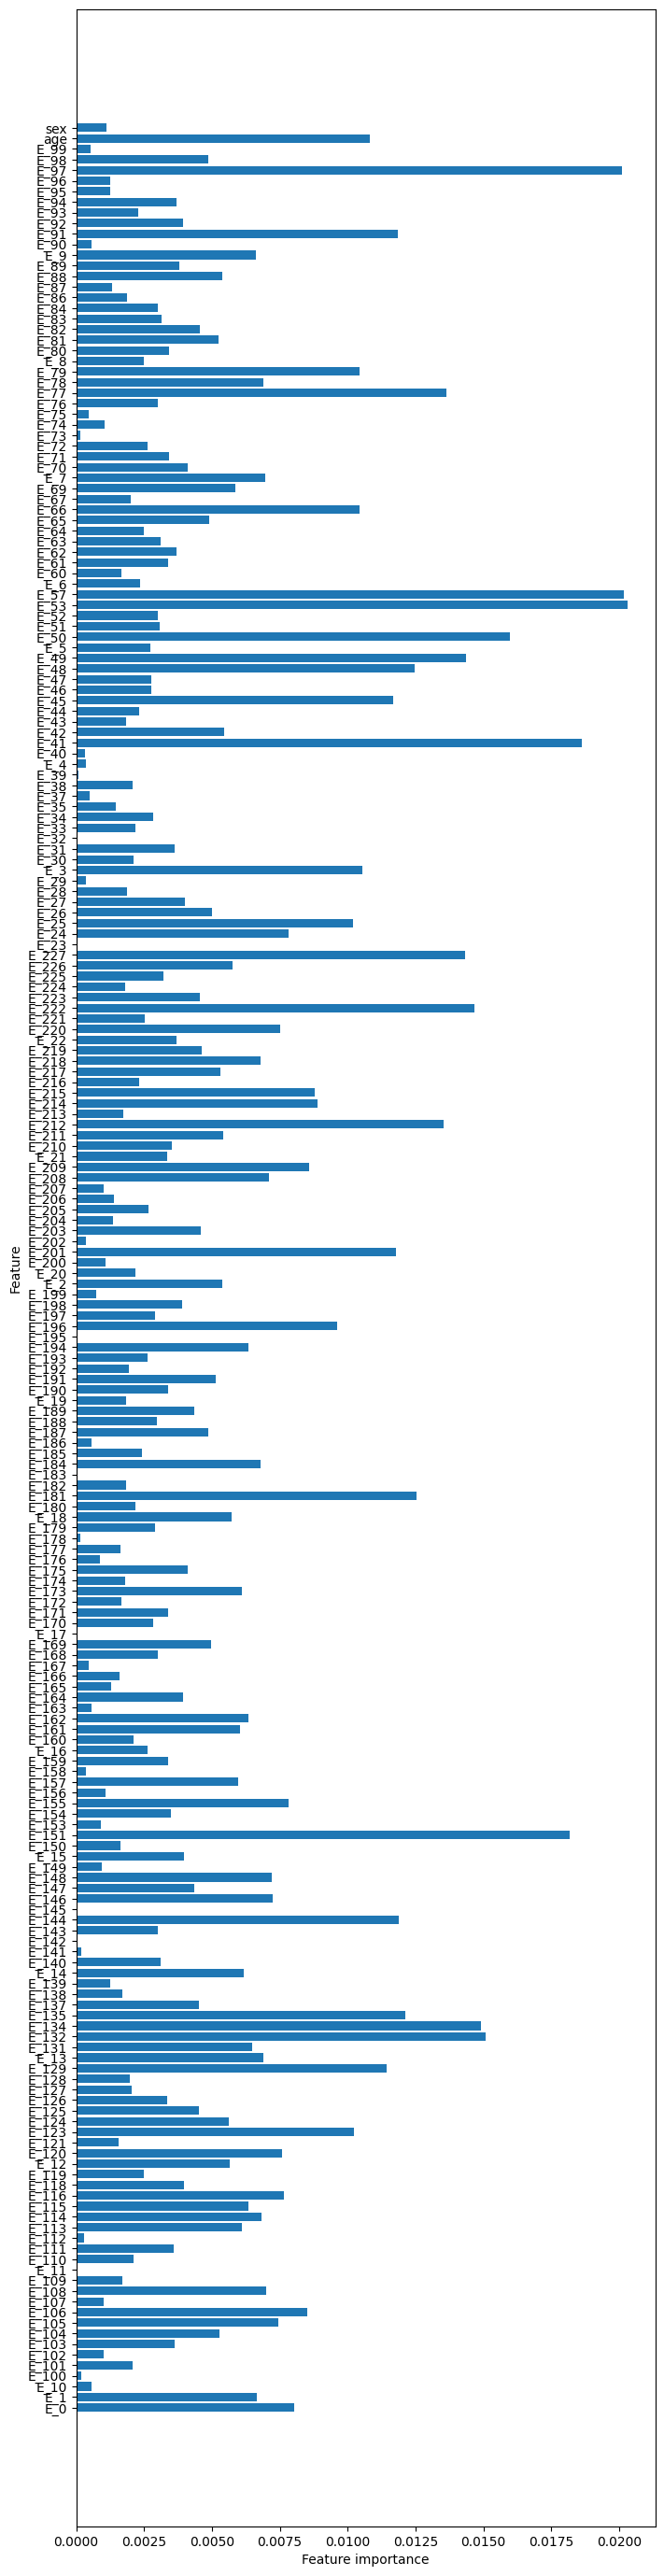

In [34]:
#visualize the important features

import matplotlib.pyplot as plt

def plot_feature_importances(model, data):
    n_features = data.shape[1]
    plt.figure(figsize=(8, 35))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(range(n_features), data.columns)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.show()
    
plot_feature_importances(rf_clf, strat_X_train)

In [50]:
#Sort the important features and their corresponding columns as a dictionary

feature_importances_dict = dict(zip(strat_X_train.columns, feature_importances))
feature_importances_dict = dict(sorted(feature_importances_dict.items(), key=lambda item: item[1], reverse=True))
feature_importances_dict = {k: v*100 for k, v in feature_importances_dict.items()}
feature_importances_dict = {k: round(v, 2) for k, v in feature_importances_dict.items()}
feature_importances_dict

{'E_53': 2.03,
 'E_57': 2.02,
 'E_97': 2.01,
 'E_41': 1.86,
 'E_151': 1.82,
 'E_50': 1.6,
 'E_132': 1.51,
 'E_134': 1.49,
 'E_222': 1.47,
 'E_49': 1.44,
 'E_227': 1.43,
 'E_77': 1.37,
 'E_212': 1.35,
 'E_181': 1.25,
 'E_48': 1.25,
 'E_135': 1.21,
 'E_144': 1.19,
 'E_91': 1.19,
 'E_201': 1.18,
 'E_45': 1.17,
 'E_129': 1.15,
 'age': 1.08,
 'E_3': 1.05,
 'E_79': 1.04,
 'E_66': 1.04,
 'E_123': 1.02,
 'E_25': 1.02,
 'E_196': 0.96,
 'E_214': 0.89,
 'E_215': 0.88,
 'E_209': 0.86,
 'E_106': 0.85,
 'E_0': 0.8,
 'E_155': 0.78,
 'E_24': 0.78,
 'E_116': 0.76,
 'E_120': 0.76,
 'E_220': 0.75,
 'E_105': 0.75,
 'E_146': 0.73,
 'E_148': 0.72,
 'E_208': 0.71,
 'E_108': 0.7,
 'E_7': 0.69,
 'E_13': 0.69,
 'E_78': 0.69,
 'E_114': 0.68,
 'E_184': 0.68,
 'E_218': 0.68,
 'E_1': 0.66,
 'E_9': 0.66,
 'E_131': 0.65,
 'E_115': 0.64,
 'E_194': 0.63,
 'E_162': 0.63,
 'E_14': 0.62,
 'E_113': 0.61,
 'E_173': 0.61,
 'E_161': 0.61,
 'E_157': 0.6,
 'E_69': 0.59,
 'E_226': 0.57,
 'E_18': 0.57,
 'E_12': 0.56,
 'E_124': 0.

In [51]:
""" drop_columns = [k for k, v in feature_importances_dict.items() if v = 0.0]
drop_columns """

' drop_columns = [k for k, v in feature_importances_dict.items() if v = 0.0]\ndrop_columns '

In [ ]:
#drop the columns with zero importance



In [17]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [18]:
#predict the model

y_pred = rf_clf.predict(strat_X_test)

In [19]:
#accuracy score

accuracy_score(strat_y_test, y_pred)

0.990873883201043

In [20]:
#cross validation score

cross_val_score(rf_clf, strat_X_train, strat_y_train, cv=3, scoring="accuracy")

array([0.99102701, 0.9913146 , 0.99068162])

In [21]:
# classification report

print(classification_report(strat_y_test, y_pred, zero_division= 1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       415
           1       1.00      1.00      1.00       641
           2       0.99      0.99      0.99       667
           3       0.99      0.99      0.99       674
           4       1.00      1.00      1.00       500
           5       0.85      0.71      0.77       373
           6       1.00      1.00      1.00       421
           7       1.00      1.00      1.00       730
           8       1.00      1.00      1.00      1347
           9       1.00      1.00      1.00       508
          10       1.00      1.00      1.00       415
          11       1.00      1.00      1.00       464
          12       1.00      0.50      0.67         2
          13       1.00      0.99      0.99       690
          14       1.00      1.00      1.00       433
          15       1.00      1.00      1.00       221
          16       0.82      0.91      0.86       543
          17       1.00    

In [22]:
#roc_auc_score

roc_auc_score(strat_y_test, y_pred)

0.9898656545757207